# Nettoyage du Jeu de Données

Après avoir extrait les données du fichier zip et chargé le jeu de données dans un DataFrame, nous avons procédé à une série d'opérations de nettoyage pour préparer les données à l'analyse.

In [1]:
import pandas as pd
from zipfile import ZipFile

# Chargement des données depuis le fichier zip
zip_file = ZipFile('../../data/raw/archive.zip')
df = pd.read_csv(zip_file.open('Online Retail Data Set.csv'), encoding='unicode_escape')

# Conversion des types de données
df = df.astype({
    'InvoiceNo': 'string',
    'StockCode': 'string',
    'Description': 'string',
    'Quantity': 'int32',
    'UnitPrice': 'float32',
    'CustomerID': 'string',
    'Country': 'string'
})

# Conversion de la colonne 'InvoiceDate' en type datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Suppression des entrées avec des quantités négatives ou nulles
df = df[df['Quantity'] > 0]

# Enregistrement du jeu de données nettoyé
df.to_csv("../../data/cleaned/OnlineRetail_Cleaned.csv", index=False, header=True)

In [2]:
df.describe()

,Quantity,UnitPrice
count,531285.000000,531285.000000
mean,10.655262,3.857297
std,156.830323,41.810047
min,1.000000,-11062.059570
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330078


# Analyse de la Recette par Jour

Nous avons groupé les données par jour et calculé la somme des prix unitaires et le nombre de pays différents par jour.

In [3]:
# Calcul de la colonne recette
df["recette"] = df["Quantity"] * df["UnitPrice"]

# Groupement des données par jour
df['date_day'] = df['InvoiceDate'].dt.date
df_by_day = df.groupby("date_day", as_index=False).agg({
    "recette": "sum",
    "Country": "count"
})

# Visualisation de la Recette par Jour

Nous avons tracé un graphique de la recette par jour pour les années 2010 et 2011.

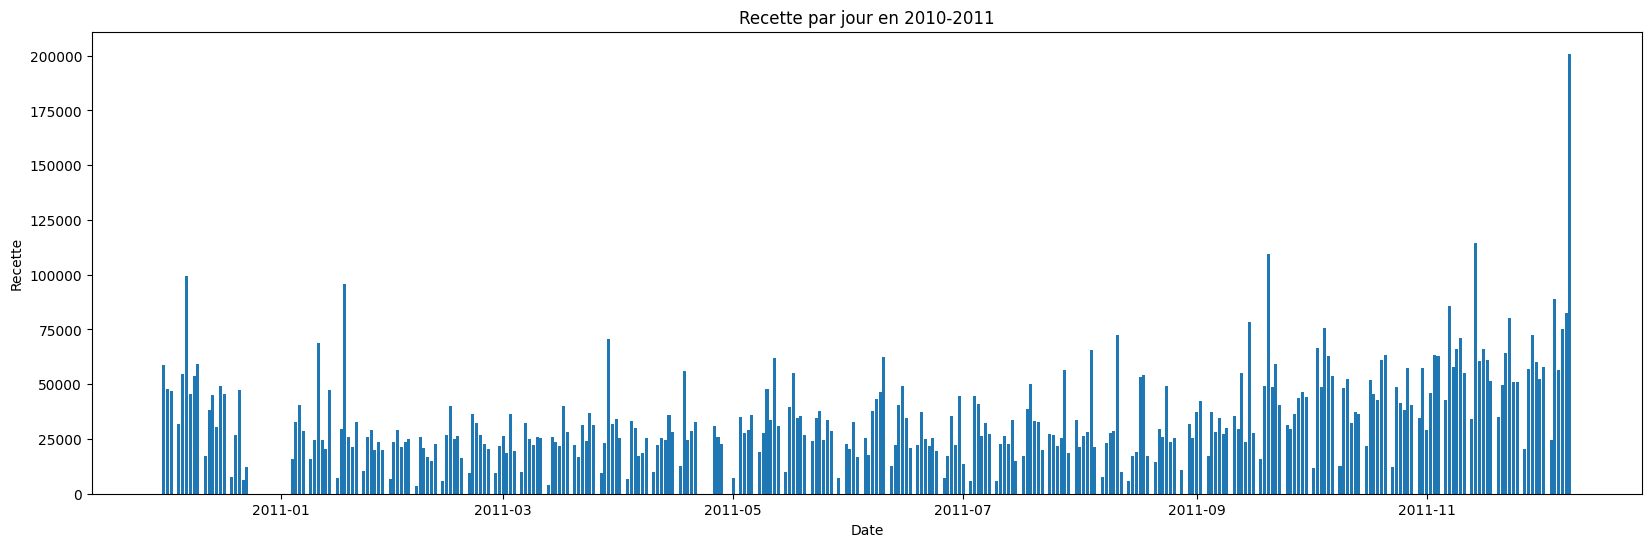

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.bar(df_by_day["date_day"], df_by_day["recette"])
plt.title("Recette par jour en 2010-2011")
plt.xlabel("Date")
plt.ylabel("Recette")
plt.show()